# Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt #menampilkan image
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import random
import os

## Path Dataset and Load the Data

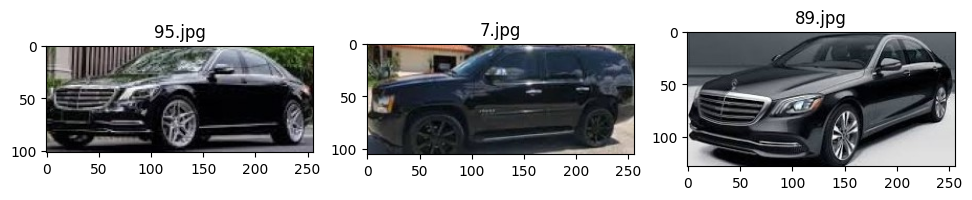

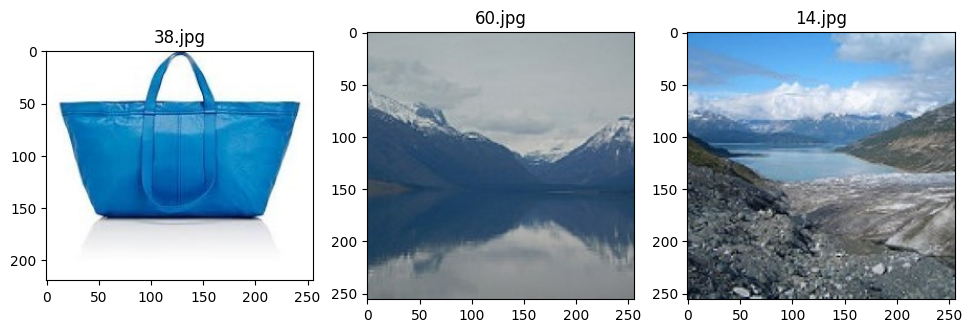

In [2]:
train_path = r'C:\Users\ACER\OneDrive\Desktop\Semester 7\Praktikum Kecerdasan Buatan\PROJECT AKHIR\Dataset\train'
test_path = r'C:\Users\ACER\OneDrive\Desktop\Semester 7\Praktikum Kecerdasan Buatan\PROJECT AKHIR\Dataset\test'
base_path = r'C:\Users\ACER\OneDrive\Desktop\Semester 7\Praktikum Kecerdasan Buatan\PROJECT AKHIR\Dataset'

folder_black_train=r'C:\Users\ACER\OneDrive\Desktop\Semester 7\Praktikum Kecerdasan Buatan\PROJECT AKHIR\Dataset\train\black'
folder_blue_test=r'C:\Users\ACER\OneDrive\Desktop\Semester 7\Praktikum Kecerdasan Buatan\PROJECT AKHIR\Dataset\test\blue'

plt.figure(figsize=(20,20))
for i in range(3):
    file = random.choice(os.listdir(folder_black_train))
    image_path= os.path.join(folder_black_train, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img) 
    
plt.figure(figsize=(20,20))
for i in range(3):
    file = random.choice(os.listdir(folder_blue_test))
    image_path= os.path.join(folder_blue_test, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img) 

## Augmentation Data

In [3]:
train_gen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range = 30, #derajat
    shear_range= .2,
    zoom_range=.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_gen = ImageDataGenerator(
    rescale=1./255
)

## Making the Generator

In [4]:
train_generator = train_gen.flow_from_directory(
    train_path,
    target_size=(224, 224), #membuat semua gambar menjadi ukuran 224 x 224
    batch_size=27,   #berapa bnyk dta gambar setiap epoch
    class_mode ='categorical', #one shot encoding
    shuffle=False
)

test_generator = test_gen.flow_from_directory(
    test_path,
    target_size=(224, 224), #membuat semua gambar menjadi ukuran 224 x 224
    batch_size=18,   #berapa bnyk dta gambar setiap epoch
    class_mode ='categorical', #one shot encoding
    shuffle=True
)

Found 972 images belonging to 9 classes.
Found 243 images belonging to 9 classes.


## Labeling

In [5]:
images, label = train_generator.next()

In [6]:
labels = ['Black', 'Blue', 'Brown', 'Green','Orange', 'Red', 'Violet', 'White', 'Yellow']

# Arsitektur Model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,4), activation = 'relu', input_shape=(224,224, 3)),
    tf.keras.layers.MaxPooling2D(1,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax')
    
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 221, 32)      800       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 111, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 397824)            0         
                                                                 
 dense (Dense)               (None, 64)                25460800  
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                                 
Total params: 25,462,185
Trainable params: 25,462,185
Non-trainable params: 0
____________________________________________

## Compile Model

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss= tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)

## Fitting Model

In [10]:
history = model.fit(
    train_generator,
    epochs = 25,
    validation_data = test_generator
)

Epoch 1/25
36/36 [==============================] - 28s 742ms/step - loss: 27.1886 - accuracy: 0.1646 - val_loss: 2.6170 - val_accuracy: 0.2798
Epoch 2/25
36/36 [==============================] - 25s 695ms/step - loss: 2.0950 - accuracy: 0.4558 - val_loss: 2.0337 - val_accuracy: 0.3663
Epoch 3/25
36/36 [==============================] - 26s 707ms/step - loss: 1.6386 - accuracy: 0.5648 - val_loss: 1.7046 - val_accuracy: 0.4815
Epoch 4/25
36/36 [==============================] - 26s 707ms/step - loss: 1.4952 - accuracy: 0.5885 - val_loss: 1.5316 - val_accuracy: 0.4280
Epoch 5/25
36/36 [==============================] - 26s 713ms/step - loss: 1.1816 - accuracy: 0.6646 - val_loss: 1.1933 - val_accuracy: 0.6543
Epoch 6/25
36/36 [==============================] - 26s 716ms/step - loss: 1.0640 - accuracy: 0.7809 - val_loss: 1.1235 - val_accuracy: 0.6091
Epoch 7/25
36/36 [==============================] - 25s 698ms/step - loss: 0.8665 - accuracy: 0.7716 - val_loss: 1.0435 - val_accuracy: 0.703

## Visualisasi Grafik

In [11]:
y_acc_train = history.history['accuracy']
y_acc_val = history.history['val_accuracy']
y_loss_train = history.history ['loss']
y_loss_val = history.history['val_loss']
x_ = range(len(y_acc_train))

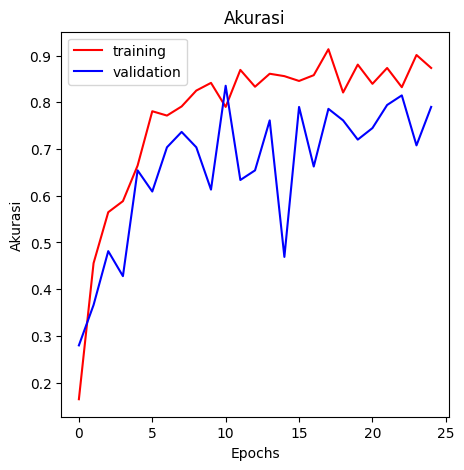

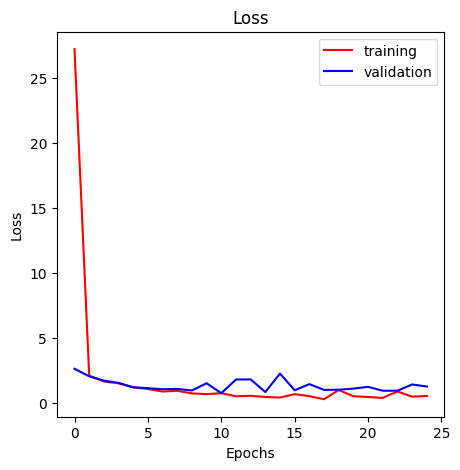

In [12]:
plt.figure(1, figsize=(5,5))
plt.plot(x_, y_acc_train, c='r', label='training')
plt.plot(x_, y_acc_val, c='b', label='validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(5,5))
plt.plot(x_, y_loss_train, c='r', label='training')
plt.plot(x_, y_loss_val, c='b', label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Evaluasi Model

In [13]:
score = model.evaluate(test_generator, batch_size=128)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

14/14 [==============================] - 1s 79ms/step - loss: 1.2530 - accuracy: 0.7901
Test loss: 1.2530477046966553
Test accuracy: 0.790123462677002
